<a href="https://colab.research.google.com/github/tago893/capstone/blob/main/Day1/EdaOnTsd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 KB 4.0 MB/s eta 0:00:00
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/base_command.py", line 167, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/req_command.py", line 199, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/command

In [7]:
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 234.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 215.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 174.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 84.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
  

In [10]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [6]:
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override() 

# download dataframe
data = pdr.get_data_yahoo("ETH-USD")

[*********************100%***********************]  1 of 1 completed


In [7]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09 00:00:00+00:00,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10 00:00:00+00:00,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11 00:00:00+00:00,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12 00:00:00+00:00,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13 00:00:00+00:00,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...
2023-01-14 00:00:00+00:00,1451.428467,1563.739136,1450.988403,1550.706909,1550.706909,15444626014
2023-01-15 00:00:00+00:00,1550.731567,1556.950806,1520.893799,1552.479492,1552.479492,6774614499
2023-01-16 00:00:00+00:00,1552.519287,1594.039795,1529.573608,1576.833496,1576.833496,8454485431


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1897 entries, 2017-11-09 00:00:00+00:00 to 2023-01-18 00:00:00+00:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1897 non-null   float64
 1   High       1897 non-null   float64
 2   Low        1897 non-null   float64
 3   Close      1897 non-null   float64
 4   Adj Close  1897 non-null   float64
 5   Volume     1897 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 168.3 KB


# VISUALIZATION


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
selected_columns = ['Open', 'High', 'Low', 'Close','Adj Close','Volume']
data[selected_columns].plot(subplots=True, figsize=(12,10))
plt.title('ETH coin attributes')
plt.show()

In [19]:
df2=pdr.get_data_yahoo("ETH-USD",end="2022-12-31")
del df2["Adj Close"]


[*********************100%***********************]  1 of 1 completed


In [ ]:
df2

In [ ]:
df2.index

In [ ]:
df2.describe()

In [ ]:
df2['Close'].plot(xlim=['01-01-2020','31-12-2022'],figsize=(12,4))

# **Re-sampling:**
Resampling is a series of techniques used in statistics to gather additional information about a sample. This may involve re-sampling or estimating its accuracy.

Techniques used are mentioned below:


**1) Year end Frequency of the closing price**

This plot helps us visualize the max and min values of years helping us
infering that:

1. Year 2021 has the maximum closing price by the end of the year

2.  Year 2018 has the minimum closing price by the end of the year

3. From year 2018 to 2020 there has been a constant value of closing price and in 2022 the low price has increased and max price has gone down a bit compared to
2021  

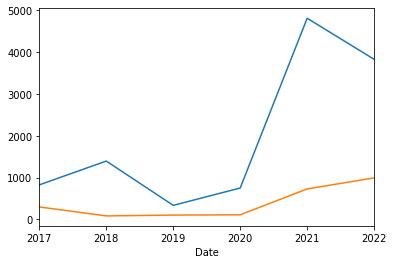

In [23]:
#Yearly end frequency for max value
df2.resample(rule='A').max()['Close'].plot()
#Yearly end frequency for min value
df2.resample(rule='A').min()['Close'].plot()

In [30]:
df2.resample(rule='A').max()['Close']

Date
2017-12-31 00:00:00+00:00     826.822998
2018-12-31 00:00:00+00:00    1396.420044
2019-12-31 00:00:00+00:00     336.753174
2020-12-31 00:00:00+00:00     751.618958
2021-12-31 00:00:00+00:00    4812.087402
2022-12-31 00:00:00+00:00    3829.564941
Freq: A-DEC, Name: Close, dtype: float64

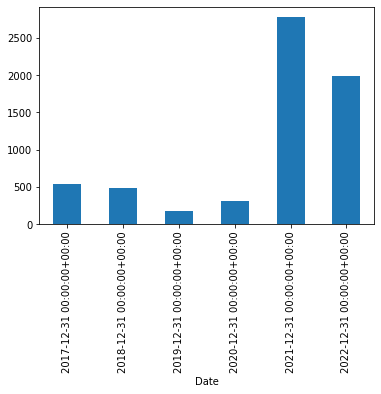

In [24]:
df2['Close'].resample(rule='A').mean().plot(kind="bar")

**2) Quaterly End Frequency of the closing price**

This plot helps us visualize the max and min values of quaterly year helping us
infering that:

1. 1st october 2021 has the high maximum closing price as well as high minimum closing price compared to other years
2. From year 2019 to 2020 the maximum and minimum close price of ethereum are near but after 2020 a even though the maximum and minimum price of ethereum price increases there is a gap in between them compared to before 2020 

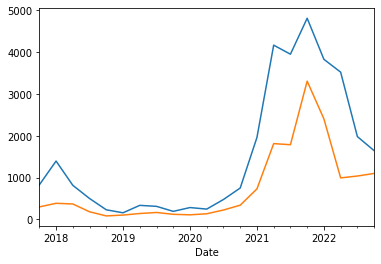

In [26]:
#Quaterly end frequency for max value
df2.resample(rule='QS').max()['Close'].plot()
#Quaterly end frequency for min value
df2.resample(rule='QS').min()['Close'].plot()

In [35]:
df2.resample(rule="QS").max()['Close']

Date
2017-10-01 00:00:00+00:00     826.822998
2018-01-01 00:00:00+00:00    1396.420044
2018-04-01 00:00:00+00:00     816.119995
2018-07-01 00:00:00+00:00     501.002014
2018-10-01 00:00:00+00:00     230.768005
2019-01-01 00:00:00+00:00     158.795425
2019-04-01 00:00:00+00:00     336.753174
2019-07-01 00:00:00+00:00     313.251404
2019-10-01 00:00:00+00:00     193.293259
2020-01-01 00:00:00+00:00     284.217499
2020-04-01 00:00:00+00:00     247.444946
2020-07-01 00:00:00+00:00     477.051910
2020-10-01 00:00:00+00:00     751.618958
2021-01-01 00:00:00+00:00    1960.164795
2021-04-01 00:00:00+00:00    4168.701172
2021-07-01 00:00:00+00:00    3952.133545
2021-10-01 00:00:00+00:00    4812.087402
2022-01-01 00:00:00+00:00    3829.564941
2022-04-01 00:00:00+00:00    3522.833496
2022-07-01 00:00:00+00:00    1981.336548
2022-10-01 00:00:00+00:00    1645.093384
Freq: QS-JAN, Name: Close, dtype: float64

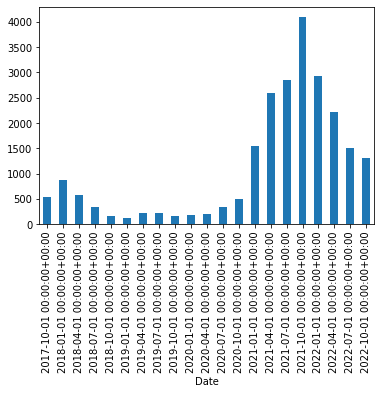

In [31]:
df2['Close'].resample(rule='QS').mean().plot(kind="bar")

**3) Monthly end frequency of the closing price**

This plot helps us visualize the max and min values of monthly helping us
infering that:

1. 30th november 2021 has the high maximum price and 31st december 2018 has high minimum price compared to other years
2. From year 2019 to 2020 the maximum and minimum closing prices of Ethereum closing price are near.

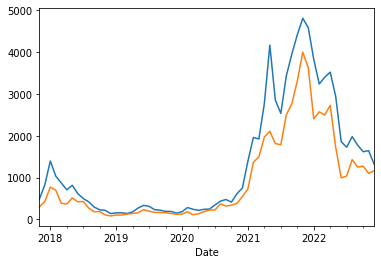

In [36]:
#Monthly end frequency for max value
df2.resample(rule='MS').max()['Close'].plot()
#Monthly end frequency for min value
df2.resample(rule='MS').min()['Close'].plot()

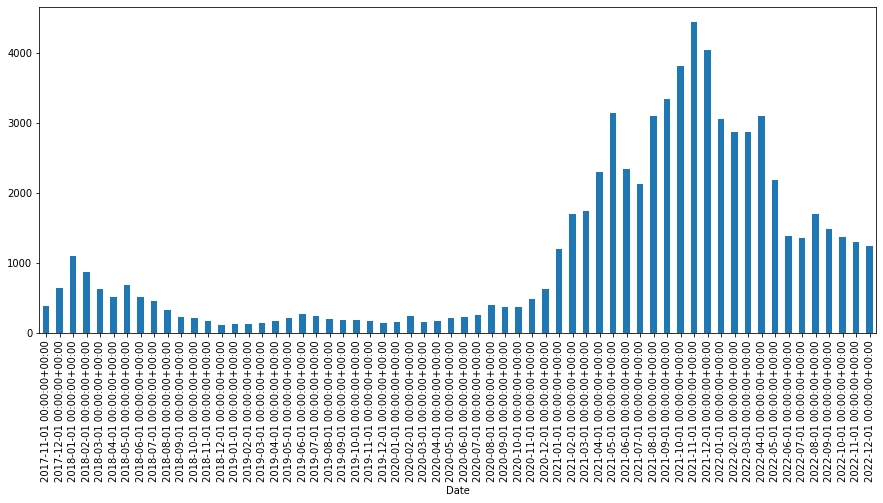

In [38]:
df2['Close'].resample(rule='MS').mean().plot(kind="bar",figsize=(15,6))

# Stationarity

a) Stationarity check

In [2]:
import statsmodels.api as sm

<Figure size 2160x720 with 0 Axes>

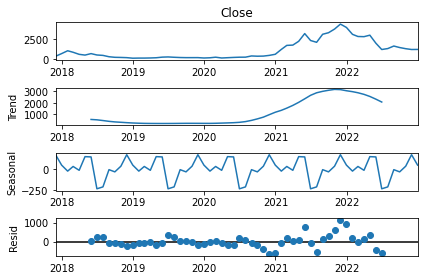

In [39]:
plt.figure(figsize=[30,10])
sm.tsa.seasonal_decompose(df2.resample(rule='M').median().Close).plot()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adf_test(df2['Close'])